#LOADING Data 

In [ ]:
from sklearn.datasets import load_wine
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import pandas as pd
import time
import random
from sklearn.ensemble import ExtraTreesClassifier
start_time = time.time()
# allow plots to appear within the notebook
%matplotlib inline
def getAccuracy(model, x, y):                    #Accuracy Calc
    return model.score(x,y)*100
data2 = load_wine()
data=pd.DataFrame(data=np.c_[data2['data'],data2['target']],columns=data2['feature_names']+['target'])
#Check data with info function
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
y = data2.target
x= data2.data
X = np.array(x)
Y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.30, random_state=42)

In [ ]:
nv = GaussianNB()
nv.fit(X_train, y_train)
ypred=nv.predict(X_test)

In [ ]:
# get accuracy for model
getAccuracy(nv,X_test,y_test)

100.0

In [ ]:
# Classification Report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [ ]:
#Plot the decision boundary on the test set (for simplicity, you can only consider 2 features when plotting the decision boundary in this question).
#selecting best 2 features 
model2 = ExtraTreesClassifier()
model2.fit(X_test,y_test)
print(model2.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model2.feature_importances_)
yt=y_test[0:].reshape(1,-1)
##print most 2 important features 
print(feat_importances.nlargest(2))
model = GaussianNB()
model.fit(X_test[:,[6,12]],yt[0])
xscore=model.score(X_test[:,[6,12]],yt[0])
print(xscore*100)

[0.12286854 0.0521816  0.041468   0.04198666 0.03492127 0.07082279
 0.13705631 0.05264397 0.02518131 0.1151291  0.0794905  0.08701493
 0.13923502]
12    0.139235
6     0.137056
dtype: float64
94.44444444444444


In [ ]:
#ploting Decision Boundaries
def decision_boundaries (trainx ,trainy, model, title):
  plt.figure(figsize = (5, 5))
  plt.scatter(trainx[trainy == 0,0], trainx[trainy == 0,1], c='y', marker='v', label=0)
  plt.scatter(trainx[trainy == 1,0], trainx[trainy == 1,1], c='r', marker='o', label=1)
  plt.scatter(trainx[trainy == 2,0], trainx[trainy == 2,1], c='b', marker='*', label=2)
  x_min, x_max = trainx[:, 0].min() - 0.1, trainx[:, 0].max() + 0.1
  y_min, y_max = trainx[:, 1].min() - 0.1, trainx[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
  z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.3)
  plt.title(title)
  plt.xlabel('flavanoids')
  plt.ylabel('proline')
  plt.legend()
  plt.show()

Text(0.5, 1.0, 'Scatter plot on 2 features from the data set')

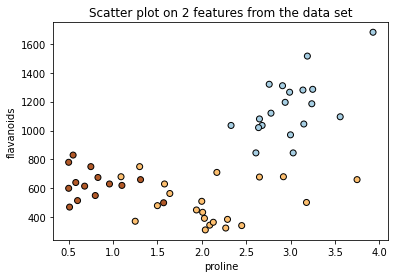

In [ ]:
#scattering most 2 important features 
plt.scatter(X_test[:,[6]],X_test[:,[12]],c=yt.reshape(-1,1),edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel('proline')
plt.ylabel('flavanoids')
plt.title('Scatter plot on 2 features from the data set') 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

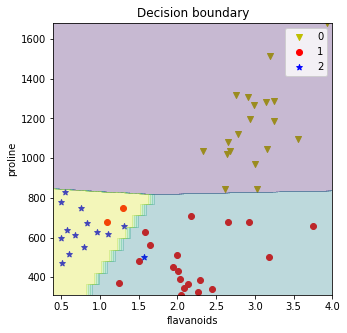

In [ ]:
### Decision boundary using LogisticRegression on selected features 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_test[:,[6,12]],yt.reshape(-1,1) )
model.fit(X_test[:,[6,12]],yt.reshape(-1,1))
decision_boundaries(X_test[:,[6,12]],yt[0],model=clf,title='Decision boundary')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:313: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


Text(0.5, 1.0, '2 features from the data set')

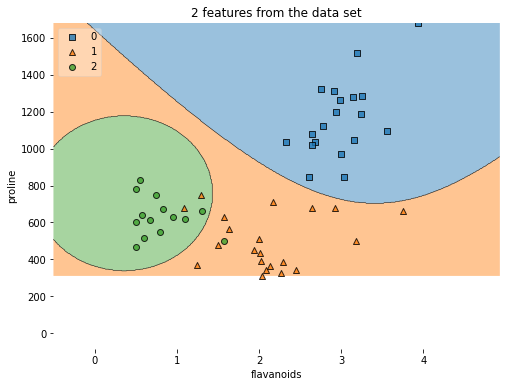

In [ ]:
#######Decision boundary for GuassianNB with 2 features 
_, ax = plt.subplots(figsize=(8, 6))
plot_decision_regions(X_test[:,[6,12]], yt[0], clf=model, 
                      X_highlight=X_test, 
                      res=0.02, legend=2,    
    ax=ax
    )
plt.xlabel('flavanoids')
plt.ylabel('proline')
plt.title("2 features from the data set")

In [ ]:
# function ( analysis of timing of prediction on test data )
atime=[]
atime2=[]
mylist=[]
def time1(n,s,x,y,x1,y1):
  classifier= KNeighborsClassifier(n_neighbors=n)
  for i in range(0,1000):
      mylist.append(i)
  randsample = random.sample(mylist,s)
  xtrr,ytrr=x.iloc[randsample,],y.iloc[randsample,]
  classifier.fit(xtrr,ytrr)
  start_time = time.time()
  pred=classifier.predict(x1)
  end2=time.time()-start_time
  score=classifier.score(x1,y1)
  atime2.append([{'ptime':end2,'n':n,'randsample':len(randsample),'n':n}])
  return atime2
###plotting time bar of prediction values 
def plottime(l):
  fig = plt.figure(figsize = (10, 5))
  labels = ['time1', 'time2', 'time3', 'time4']
  times = l
  plt.bar(labels,times, color =['c','g','black','red'],width = 0.3)
  plt.title('Prediction Time ')
  plt.xlabel('cases')
  plt.ylabel('prediction time')
  plt.show()

In [ ]:
##function to change number of training samples Using  10% to 100% fixed K=2
scorett=[]
scorevv=[]
def diffvalues(x,y,x1,y1,x2,y2,clf):
  e=100
  results=[]
  results_ = []
  for i in range(1, 11):
    z=(1-i*0.1)
    if z==0:
      # xtrr=x
      print("....")
      # ytrr=y
    else:
      xtrr,_,ytrr,_= train_test_split(x, y, test_size=z, random_state=4)
    clf.fit(xtrr, ytrr)
    accvalid=clf.score(x1,y1)
    acctest=clf.score(x2,y2)
    scorett.append(acctest)
    scorevv.append(accvalid)
    results_.append({'loop %': e/10,"Accuracy test":acctest ,"Accuracy Valid":accvalid })
    print('Train Sample ={:.2f}, \
 test score :{:.2f}, valid score :{:.2f}\n'
         .format( e/10, acctest,accvalid))
    e=e+100
  return results_

In [ ]:
### 100% of training samples, try to find the best K value, and show the accuracy curve on the validation set when K varies from 1 to 10
scoret=[]
scorev=[]
def kvalue(x,y,x1,y1,x2,y2):
  k=1
  results=[]
  for i in range(10):
    classifier= KNeighborsClassifier(n_neighbors=k,metric='manhattan',weights='distance')
    classifier.fit(x,y)
    acctrain=classifier.score(x,y)
    accvalid=classifier.score(x1,y1)
    acctest=classifier.score(x2,y2)    
    results.append({'KNeighbors': k,"Accuracy Valid":accvalid })
    print('KNeighbors={:.2f}, \
 train score :{:.2f}, test score :{:.2f}, valid score :{:.2f}\n'
         .format( k,acctrain, acctest,accvalid))
    scoret.append(acctest)
    scorev.append(accvalid)
    k=k+1
  return sorted(results, key=lambda d: d['Accuracy Valid']) 

In [ ]:
######reader by default take the first raw as columns names thats why i used Header=None
data2 = pd.read_csv('car_evaluation.csv',header = None)
####renaming feature names 
data2.rename(columns = {0:'buying',1:'maintainence',2:'doors',3:'persons',4:'lug_boot',5:'safety',6:'class'},inplace = True)
data2

,buying,maintainence,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# New Section

In [ ]:
#Shuffling the whole data
data_shuffle = data2.sample(frac = 1)

In [ ]:
###############label encoder part 
dff=data_shuffle.columns
le = preprocessing.LabelEncoder()
for i in dff:
  data_shuffle[i]=le.fit_transform(data_shuffle[i])

In [ ]:
###############Splitting data into train data= 1000 and valid as 300 and test as the rest
X_train2=data_shuffle.iloc[:1000,:6] 
y_train2=data_shuffle.iloc[:1000,-1]
X_valid2=data_shuffle.iloc[1000:1300,:6]
y_valid2=data_shuffle.iloc[1000:1300,-1]
X_test2=data_shuffle.iloc[1300:,:6]
y_test2=data_shuffle.iloc[1300:,-1]

In [ ]:
#different number of training samples to show the impact of number of training samples. Use 10%, 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90% and 100% fixed K=2
#return the accuracy values and store it on " call " varriable
classifier= KNeighborsClassifier(n_neighbors=2,metric='manhattan',weights='distance')
call=diffvalues(X_train2,y_train2,X_valid2,y_valid2,X_test2,y_test2,classifier)

Train Sample =10.00,  test score :0.67, valid score :0.69

Train Sample =20.00,  test score :0.72, valid score :0.70

Train Sample =30.00,  test score :0.76, valid score :0.71

Train Sample =40.00,  test score :0.78, valid score :0.73

Train Sample =50.00,  test score :0.80, valid score :0.78

Train Sample =60.00,  test score :0.78, valid score :0.77

Train Sample =70.00,  test score :0.79, valid score :0.78

Train Sample =80.00,  test score :0.78, valid score :0.78

Train Sample =90.00,  test score :0.78, valid score :0.80

....
Train Sample =100.00,  test score :0.78, valid score :0.80



In [ ]:
#Use 100% of training samples K varies from 1 to 10
cal=kvalue(X_train2,y_train2,X_valid2,y_valid2,X_test2,y_test2)

KNeighbors=1.00,  train score :1.00, test score :0.77, valid score :0.77

KNeighbors=2.00,  train score :1.00, test score :0.76, valid score :0.75

KNeighbors=3.00,  train score :1.00, test score :0.86, valid score :0.87

KNeighbors=4.00,  train score :1.00, test score :0.88, valid score :0.89

KNeighbors=5.00,  train score :1.00, test score :0.91, valid score :0.90

KNeighbors=6.00,  train score :1.00, test score :0.89, valid score :0.92

KNeighbors=7.00,  train score :1.00, test score :0.89, valid score :0.91

KNeighbors=8.00,  train score :1.00, test score :0.89, valid score :0.90

KNeighbors=9.00,  train score :1.00, test score :0.88, valid score :0.90

KNeighbors=10.00,  train score :1.00, test score :0.89, valid score :0.90



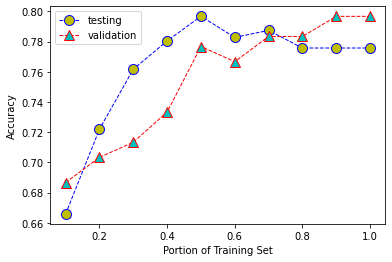

In [ ]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
L=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
plt.plot(L, scorett,color='b', linestyle='dashed', linewidth = 1, marker='o', markerfacecolor='y', markersize=10)
plt.plot(L, scorevv,color='red', linestyle='dashed', linewidth = 1, marker='^', markerfacecolor='c', markersize=10)
plt.xlabel('Portion of Training Set')
plt.ylabel('Accuracy')
plt.legend( ['testing','validation'])

Text(0.5, 1.0, 'Validation Accuracy')

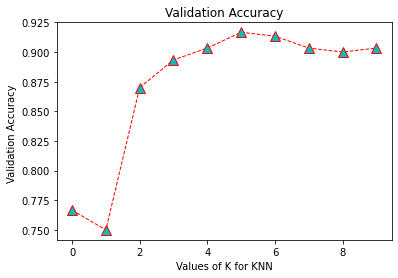

In [ ]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(scorev,label='Validation Score',color='red', linestyle='dashed', linewidth = 1, marker='^', markerfacecolor='c', markersize=10)
plt.xlabel('Values of K for KNN')
plt.ylabel('Validation Accuracy ')
plt.title("Validation Accuracy")

In [ ]:
###the K value list sorted to find the best K 
cal

[{'Accuracy Valid': 0.75, 'KNeighbors': 2},
 {'Accuracy Valid': 0.7666666666666667, 'KNeighbors': 1},
 {'Accuracy Valid': 0.87, 'KNeighbors': 3},
 {'Accuracy Valid': 0.8933333333333333, 'KNeighbors': 4},
 {'Accuracy Valid': 0.9, 'KNeighbors': 9},
 {'Accuracy Valid': 0.9033333333333333, 'KNeighbors': 5},
 {'Accuracy Valid': 0.9033333333333333, 'KNeighbors': 8},
 {'Accuracy Valid': 0.9033333333333333, 'KNeighbors': 10},
 {'Accuracy Valid': 0.9133333333333333, 'KNeighbors': 7},
 {'Accuracy Valid': 0.9166666666666666, 'KNeighbors': 6}]

In [ ]:
#######best K Value 
classifier= KNeighborsClassifier(n_neighbors=6,metric='manhattan',weights='distance')
classifier.fit(X_train2,y_train2)
accvalid=classifier.score(X_valid2,y_valid2)
print('Validation Score={:.2f}\n'
         .format(accvalid))

Validation Score=0.92



In [ ]:
## Analysis the training time when use different number of training samples. Consider the following 4 cases  n  ,  t 
n=[2,2,10,10]
t=[100,1000,100,1000]
for f, b in zip(n, t):
  time1(f,b,X_train2,y_train2,X_test2,y_test2)

In [ ]:
###taking the time values for plotting 
elist=[]
for i in range(len(atime2)):
  elist.append(atime2[i][0]['ptime'])

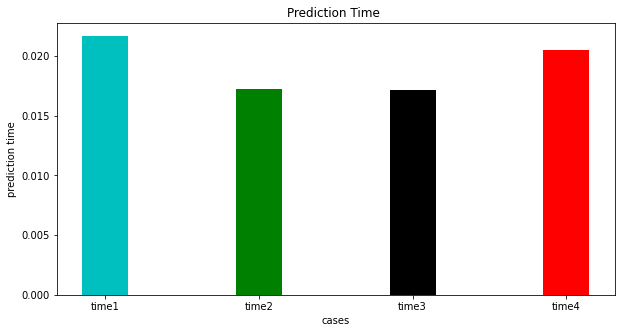

In [ ]:
#plotting prediction time on the testing data
plottime(elist)

In [ ]:
#printing all times 
atime2

[[{'n': 2, 'ptime': 0.021692752838134766, 'randsample': 100}],
 [{'n': 2, 'ptime': 0.017238616943359375, 'randsample': 1000}],
 [{'n': 10, 'ptime': 0.017142772674560547, 'randsample': 100}],
 [{'n': 10, 'ptime': 0.020524024963378906, 'randsample': 1000}]]

In [ ]:
#best timing for prediction on test data
atime2[2]

[{'n': 10, 'ptime': 0.017142772674560547, 'randsample': 100}]